In [1]:
import pandas as pd
import pathlib
pathlib.Path().resolve()
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
X = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Fall - 2022/Luis Rueda Project/TCGA-PANCAN-HiSeq-801x20531/data.csv')
y = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Fall - 2022/Luis Rueda Project/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [ ]:
print(X.shape)
print(y.shape)
X = X.iloc[:, 1:]
y = y.iloc[:, 1:]
print(X.shape)
print(y.shape)

(801, 20532)
(801, 2)
(801, 20531)
(801, 1)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_PCA = le.fit_transform(y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
le.classes_

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

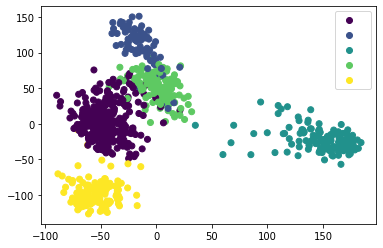

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
Xt = pca.fit_transform(X)
plot = plt.scatter(Xt[:,0], Xt[:,1], c=y_PCA)
plt.legend(handles=plot.legend_elements()[0])
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
print(X.shape)
print(y.shape)

(1500, 20531)
(1500, 1)


In [ ]:
print(X.shape)
print(y.shape)

(1500, 20531)
(1500, 1)


In [ ]:
print(X.nunique())
print(y.nunique())

gene_0         116
gene_1        1467
gene_2        1492
gene_3        1499
gene_4        1498
              ... 
gene_20526    1499
gene_20527    1500
gene_20528    1499
gene_20529    1499
gene_20530     268
Length: 20531, dtype: int64
Class    5
dtype: int64


In [ ]:
y.value_counts()

Class
BRCA     300
COAD     300
KIRC     300
LUAD     300
PRAD     300
dtype: int64

In [ ]:
print(X.isin([0,0.0]).sum())

gene_0        1385
gene_1          33
gene_2           7
gene_3           0
gene_4           0
              ... 
gene_20526       0
gene_20527       0
gene_20528       0
gene_20529       0
gene_20530    1233
Length: 20531, dtype: int64


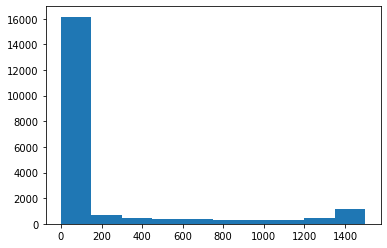

In [ ]:
plt.hist(X.isin([0,0.0]).sum())
plt.show()

In [ ]:
sample_reduction = X.isin([0,0.0]).sum()
print(sample_reduction)
print(type(sample_reduction))


gene_0        1385
gene_1          33
gene_2           7
gene_3           0
gene_4           0
              ... 
gene_20526       0
gene_20527       0
gene_20528       0
gene_20529       0
gene_20530    1233
Length: 20531, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
X1 = X.dropna()
X2_for_plot = X.dropna()

In [ ]:
print(X1.shape)
print(X2_for_plot.shape)

(1500, 20531)
(1500, 20531)


In [ ]:
X1 = X1.drop(columns=X1.columns[(X1 == 0.0).sum()>500])
X2_for_plot = X2_for_plot.drop(columns=X2_for_plot.columns[(X2_for_plot == 0.0).sum()>500])

In [ ]:
print(X1.shape)
print(X2_for_plot.shape)

(1500, 17434)
(1500, 17434)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X1)

In [ ]:
from sklearn.feature_selection import chi2, mutual_info_classif

In [ ]:
chi_scores = chi2(X1,y)
print(chi_scores)

(array([15.47114061, 21.2202138 , 43.62667244, ...,  2.46870572,
        5.04925706, 26.11924886]), array([3.81747116e-03, 2.86368562e-04, 7.66968009e-09, ...,
       6.50248148e-01, 2.82280653e-01, 2.99399378e-05]))


In [ ]:
information_gain = mutual_info_classif(X1, y)
print(information_gain)

[0.13366164 0.20009315 0.41706564 ... 0.04756938 0.13354907 0.23658593]


In [ ]:
print(chi_scores[0].max())
print(information_gain.max())

803.3344508833293
1.0263338705193081


In [ ]:
p_values = pd.Series(chi_scores[1],index = X2_for_plot.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values_IG = pd.Series(information_gain, index = X2_for_plot.columns)
p_values_IG.sort_values(ascending = False, inplace= True)

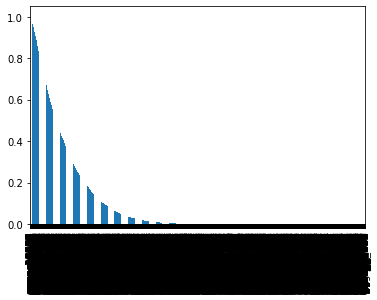

In [ ]:
p_values.plot.bar()


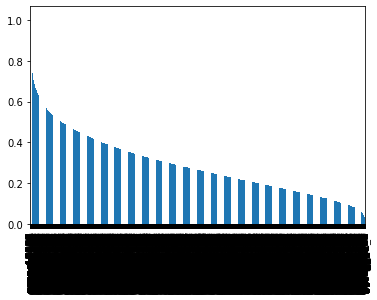

In [ ]:
p_values_IG.plot.bar()

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
chi2_selector = SelectKBest(chi2, k=500)
X_kbest = chi2_selector.fit_transform(X_train_minmax, y)

IG_selector = SelectKBest(mutual_info_classif, k=500)
X_kbest_IG = IG_selector.fit_transform(X_train_minmax, y)

print(X_kbest)
print(X_kbest_IG)
print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)
print('Reduced number of features:', X_kbest_IG.shape)

[[0.54392885 0.74964073 0.40382025 ... 0.06978024 0.76753778 0.28673375]
 [0.75009053 0.15113876 0.07367723 ... 0.71186528 0.03323029 0.        ]
 [0.45961062 0.19342392 0.28947622 ... 0.         0.84979643 0.        ]
 ...
 [0.20035253 0.34789194 0.41136668 ... 0.18501663 0.92236631 0.32757279]
 [0.42341263 0.20562305 0.58566632 ... 0.0355222  0.83491266 0.38046231]
 [0.31499457 0.25354408 0.14280021 ... 0.10937452 0.93415484 0.5704287 ]]
[[0.80855269 0.33949509 0.59004708 ... 0.74745988 0.75555621 0.46528234]
 [0.51547788 0.30895138 0.52395378 ... 0.6240065  0.20897426 0.27412372]
 [0.85319991 0.31723926 0.85801421 ... 0.17397537 0.80919747 0.48189765]
 ...
 [0.92917737 0.21989841 0.72354991 ... 0.82705645 0.88370617 0.61201903]
 [0.93474645 0.27014456 0.89235793 ... 0.84758986 0.83446494 0.5025047 ]
 [0.93345078 0.18569243 0.68294951 ... 0.80236236 0.88391056 0.4950797 ]]
Original number of features: (1500, 20531)
Reduced number of features: (1500, 500)
Reduced number of features: (

In [ ]:
pip install mrmr_selection

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 752 kB/s 
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=c70eb2a4102c590e2dd3eb170cf33f2ed7304bf2ebac9188238830a1052b90a9
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
from mrmr import mrmr_classif

In [ ]:
X_train_minmax.shape

(1500, 17434)

In [ ]:
# use mrmr classification
selected_features = mrmr_classif(X1, y, K = 100)
top_100_mrmr = selected_features
print(selected_features)

100%|██████████| 100/100 [10:05<00:00,  6.05s/it]

['gene_9175', 'gene_3848', 'gene_15590', 'gene_7964', 'gene_3523', 'gene_16358', 'gene_15898', 'gene_3921', 'gene_7421', 'gene_7238', 'gene_203', 'gene_6733', 'gene_12013', 'gene_16169', 'gene_15894', 'gene_7560', 'gene_7896', 'gene_12808', 'gene_11449', 'gene_16246', 'gene_12568', 'gene_16392', 'gene_3461', 'gene_11550', 'gene_7965', 'gene_1510', 'gene_11910', 'gene_11566', 'gene_1189', 'gene_8003', 'gene_16342', 'gene_15900', 'gene_2288', 'gene_17664', 'gene_18746', 'gene_15161', 'gene_10809', 'gene_14503', 'gene_1482', 'gene_4456', 'gene_19236', 'gene_17801', 'gene_9177', 'gene_5577', 'gene_11464', 'gene_5576', 'gene_14798', 'gene_12079', 'gene_8348', 'gene_6361', 'gene_19159', 'gene_2638', 'gene_18745', 'gene_4442', 'gene_18636', 'gene_8349', 'gene_16377', 'gene_3440', 'gene_15897', 'gene_5625', 'gene_8005', 'gene_3541', 'gene_3970', 'gene_6594', 'gene_16337', 'gene_11393', 'gene_4578', 'gene_4178', 'gene_10460', 'gene_13507', 'gene_12977', 'gene_15633', 'gene_6584', 'gene_14190', 

In [ ]:
top_100_mrmr = ['gene_9175', 'gene_3848', 'gene_15590', 'gene_7964', 'gene_3523', 'gene_16358', 'gene_15898', 'gene_3921', 'gene_7421', 'gene_7238', 'gene_203', 'gene_6733', 'gene_12013', 'gene_16169', 'gene_15894', 'gene_7560', 'gene_7896', 'gene_12808', 'gene_11449', 'gene_16246', 'gene_12568', 'gene_16392', 'gene_3461', 'gene_11550', 'gene_7965', 'gene_1510', 'gene_11910', 'gene_11566', 'gene_1189', 'gene_8003', 'gene_16342', 'gene_15900', 'gene_2288', 'gene_17664', 'gene_18746', 'gene_15161', 'gene_10809', 'gene_14503', 'gene_1482', 'gene_4456', 'gene_19236', 'gene_17801', 'gene_9177', 'gene_5577', 'gene_11464', 'gene_5576', 'gene_14798', 'gene_12079', 'gene_8348', 'gene_6361', 'gene_19159', 'gene_2638', 'gene_18745', 'gene_4442', 'gene_18636', 'gene_8349', 'gene_16377', 'gene_3440', 'gene_15897', 'gene_5625', 'gene_8005', 'gene_3541', 'gene_3970', 'gene_6594', 'gene_16337', 'gene_11393', 'gene_4578', 'gene_4178', 'gene_10460', 'gene_13507', 'gene_12977', 'gene_15633', 'gene_6584', 'gene_14190', 'gene_5729', 'gene_742', 'gene_89', 'gene_8801', 'gene_11259', 'gene_10284', 'gene_753', 'gene_6876', 'gene_13210', 'gene_2774', 'gene_8004', 'gene_6816', 'gene_5407', 'gene_12078', 'gene_16272', 'gene_223', 'gene_17168', 'gene_10841', 'gene_8013', 'gene_148', 'gene_18632', 'gene_15893', 'gene_19201', 'gene_14866', 'gene_18650', 'gene_6836']
X_mrmr_top100 =  X1[top_100_mrmr]

In [ ]:
top_10_mrmr = ['gene_9175', 'gene_3848', 'gene_15590', 'gene_7964', 'gene_3523', 'gene_16358', 'gene_15898', 'gene_3921', 'gene_7421', 'gene_7238']
X_mrmr_top10 =  X1[top_10_mrmr]

In [ ]:
print("mrmr 100 features, RandomForest")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))



from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mrmr 10 features, RandomForest
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.83 %
Standard Deviation: 0.33 %


In [ ]:
print("chi2 - 500 features, RandomForest")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))



from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

chi2 - 500 features, RandomForest
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.92 %
Standard Deviation: 0.25 %


In [ ]:
print("IG_selector - 500 features, RandomForest")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))



from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

IG_selector - 500 features, RandomForest
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.83 %
Standard Deviation: 0.33 %


In [ ]:
print("mrmr 100 features, Decision Tree")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mrmr 100 features, Decision Tree
[[51  0  0  3  0]
 [ 0 58  1  0  0]
 [ 0  0 69  0  0]
 [ 0  1  0 59  0]
 [ 0  0  0  0 58]]
0.9833333333333333
FP =  [0 1 1 3 0]
FN =  [3 1 0 1 0]
TP =  [51 58 69 59 58]
TN =  [246 240 230 237 242]
PPV:0.984075607279544
 NPV:0.9959201497926571
 Sensitivity:0.982165725047081
 Specificity:0.995804323615527
 Accuracy:0.9933333333333334
Accuracy: 98.92 %
Standard Deviation: 0.75 %


In [ ]:
print("chi2 - 500 features, Decision Tree")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

chi2 - 500 features, Decision Tree
[[53  0  0  1  0]
 [ 0 58  1  0  0]
 [ 0  0 69  0  0]
 [ 0  1  0 59  0]
 [ 0  0  0  0 58]]
0.99
FP =  [0 1 1 1 0]
FN =  [1 1 0 1 0]
TP =  [53 58 69 59 58]
TN =  [246 240 230 239 242]
PPV:0.9904196933010493
 NPV:0.9975270745488041
 Sensitivity:0.9895731324544883
 Specificity:0.9974709902821937
 Accuracy:0.9960000000000001
Accuracy: 98.83 %
Standard Deviation: 0.85 %


In [ ]:
print("IG selector - 500 features, Decision Tree")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_IG, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clf, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

IG selector - 500 features, Decision Tree
[[54  0  0  0  0]
 [ 0 58  1  0  0]
 [ 0  0 69  0  0]
 [ 0  1  0 59  0]
 [ 0  0  0  0 58]]
0.9933333333333333
FP =  [0 1 1 0 0]
FN =  [0 1 0 1 0]
TP =  [54 58 69 59 58]
TN =  [246 240 230 240 242]
PPV:0.9937530266343826
 NPV:0.9983402489626556
 Sensitivity:0.9932768361581921
 Specificity:0.998304323615527
 Accuracy:0.9973333333333333
Accuracy: 99.00 %
Standard Deviation: 0.90 %


In [ ]:
print("mrmr 100 features, SVC")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42, decision_function_shape='ovr')
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


mrmr 100 features, SVC
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.83 %
Standard Deviation: 0.33 %


In [ ]:
print("chi 2 = 500 features, SVC")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42, decision_function_shape='ovr')
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


chi 2 = 500 features, SVC
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.83 %
Standard Deviation: 0.33 %


In [ ]:
print("IG selector = 500 features, SVC")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_IG, y, test_size = 0.2, random_state = 42)

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 42, decision_function_shape='ovr')
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


IG selector = 500 features, SVC
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.92 %
Standard Deviation: 0.25 %


In [ ]:
print("mrmr 100 features, Logistic Regression")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


mrmr 100 features, Logistic Regression
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [ ]:
print("chi 2 = 500 features, Logistic Regression")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


chi 2 = 500 features, Logistic Regression
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.92 %
Standard Deviation: 0.25 %


In [ ]:
print("IG 500 features, Logistic Regression")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_IG, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


IG 500 features, Logistic Regression
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.83 %
Standard Deviation: 0.50 %


In [ ]:
print("mrmr 100 features, KNN -5 ")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


mrmr 100 features, KNN -5 
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.67 %
Standard Deviation: 0.55 %


In [ ]:
print("chi 2 500 features, KNN -5 ")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


chi 2 500 features, KNN -5 
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.92 %
Standard Deviation: 0.25 %


In [ ]:
print("IG 500 features, KNN -5 ")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_IG, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


IG 500 features, KNN -5 
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.92 %
Standard Deviation: 0.25 %


In [ ]:
print("mrmr 100 features, GaussianNB")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mrmr_top100, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


mrmr 100 features, GaussianNB
[[54  0  0  0  0]
 [ 0 59  0  0  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
1.0
FP =  [0 0 0 0 0]
FN =  [0 0 0 0 0]
TP =  [54 59 69 60 58]
TN =  [246 241 231 240 242]
PPV:1.0
 NPV:1.0
 Sensitivity:1.0
 Specificity:1.0
 Accuracy:1.0
Accuracy: 99.58 %
Standard Deviation: 0.77 %


In [ ]:
print("chi 2 500 features, GaussianNB")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


chi 2 500 features, GaussianNB
[[54  0  0  0  0]
 [ 0 58  0  1  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
0.9966666666666667
FP =  [0 0 0 1 0]
FN =  [0 1 0 0 0]
TP =  [54 58 69 60 58]
TN =  [246 241 231 239 242]
PPV:0.9967213114754099
 NPV:0.9991735537190083
 Sensitivity:0.9966101694915255
 Specificity:0.9991666666666668
 Accuracy:0.9986666666666666
Accuracy: 99.83 %
Standard Deviation: 0.33 %


In [ ]:
print("IG 500 features, GaussianNB")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_kbest_IG, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


IG 500 features, GaussianNB
[[54  0  0  0  0]
 [ 0 58  0  1  0]
 [ 0  0 69  0  0]
 [ 0  0  0 60  0]
 [ 0  0  0  0 58]]
0.9966666666666667
FP =  [0 0 0 1 0]
FN =  [0 1 0 0 0]
TP =  [54 58 69 60 58]
TN =  [246 241 231 239 242]
PPV:0.9967213114754099
 NPV:0.9991735537190083
 Sensitivity:0.9966101694915255
 Specificity:0.9991666666666668
 Accuracy:0.9986666666666666
Accuracy: 99.83 %
Standard Deviation: 0.33 %


In [4]:
### Run this seperately (It is from beginning again)

In [29]:
X = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Fall - 2022/Luis Rueda Project/TCGA-PANCAN-HiSeq-801x20531/data.csv')
y = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Fall - 2022/Luis Rueda Project/TCGA-PANCAN-HiSeq-801x20531/labels.csv')

In [30]:
print(X.shape)
print(y.shape)

(801, 20532)
(801, 2)


In [31]:
data = pd.merge(X,y)

In [40]:
data = data.iloc[:, 1:]
data.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [41]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [42]:
print(X)

[[ 0.          2.01720929  3.26552691 ...  8.92132623  5.28675919
   0.        ]
 [ 0.          0.59273209  1.58842082 ...  9.39785429  2.09416849
   0.        ]
 [ 0.          3.51175898  4.32719872 ... 10.09046974  1.68302267
   0.        ]
 ...
 [ 0.          3.24958187  3.70749166 ...  9.46671072  4.6774575
   0.5866927 ]
 [ 0.          2.59033853  2.78797567 ... 10.40058062  5.71875068
   0.        ]
 [ 0.          2.32524248  3.80593214 ...  9.84479363  4.55071601
   0.        ]]


In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:-1])
X[:, 1:-1] = imputer.transform(X[:, 1:-1])

In [44]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [45]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [46]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)

In [47]:
from sklearn.feature_selection import chi2
chi_scores = chi2(X_train_minmax,y)
print(chi_scores)

(array([ 4.02195666,  6.39217669, 11.23145717, ...,  2.94945568,
        9.03163842,  4.77200095]), array([0.4030425 , 0.17171218, 0.02408229, ..., 0.56631919, 0.06031352,
       0.31150152]))


In [48]:
from sklearn.feature_selection import SelectKBest
chi2_selector = SelectKBest(chi2, k=300)
X = chi2_selector.fit_transform(X_train_minmax, y)
print(X)

[[0.05449182 0.         0.         ... 0.         0.         0.76753778]
 [0.         0.         0.15216606 ... 0.25719565 0.78158091 0.03323029]
 [0.15495099 0.         0.         ... 0.         0.03118486 0.84979643]
 ...
 [0.09230595 0.68572286 0.04922496 ... 0.0596229  0.72726496 0.82074156]
 [0.         0.05840526 0.         ... 0.         0.06857869 0.78273199]
 [0.         0.07511677 0.         ... 0.         0.         0.65009143]]


In [49]:
print('Reduced number of features:', X.shape)

Reduced number of features: (801, 300)


In [50]:
from sklearn.feature_selection import mutual_info_classif

cols_selector = SelectKBest(mutual_info_classif, k=50)
X = cols_selector.fit_transform(X, y)
print(X.shape)

(801, 50)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)


Epoch 1/100
18/18 [==============================] - 1s 4ms/step - loss: 0.4733 - accuracy: 0.1768
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.0964
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: -0.5176 - accuracy: 0.0893
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: -1.3535 - accuracy: 0.0893
Epoch 5/100
18/18 [==============================] - 0s 3ms/step - loss: -2.3253 - accuracy: 0.0893
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: -3.4335 - accuracy: 0.0893
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: -4.8138 - accuracy: 0.0893
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: -6.4906 - accuracy: 0.0893
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: -8.5142 - accuracy: 0.0893
Epoch 10/100
18/18 [==============================] - 0s 3ms/step - loss: -10.9622 - accuracy: 0.0893


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = ann.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print("FP = ",FP)
print("FN = ",FN)
print("TP = ",TP)
print("TN = ",TN)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
avg_PPV  = np.average(PPV, axis=None, weights=None, returned=False)
avg_NPV  = np.average(NPV, axis=None, weights=None, returned=False)
avg_TPR  = np.average(TPR, axis=None, weights=None, returned=False)
avg_TNR  = np.average(TNR, axis=None, weights=None, returned=False)
avg_ACC  = np.average(ACC, axis=None, weights=None, returned=False)
print("PPV:{}\n NPV:{}\n Sensitivity:{}\n Specificity:{}\n Accuracy:{}".format(avg_PPV, avg_NPV, avg_TPR, avg_TNR,avg_ACC))


8/8 [==============================] - 0s 2ms/step
[[ 0 90  0  0  0]
 [ 0 28  0  0  0]
 [ 0 41  0  0  0]
 [ 0 40  0  0  0]
 [ 0 42  0  0  0]]
FP =  [  0 213   0   0   0]
FN =  [90  0 41 40 42]
TP =  [ 0 28  0  0  0]
TN =  [151   0 200 201 199]
PPV:nan
 NPV:nan
 Sensitivity:0.2
 Specificity:0.8
 Accuracy:0.6464730290456432


<ipython-input-53-d2ce4f206c41>:21: RuntimeWarning: invalid value encountered in true_divide
  PPV = TP/(TP+FP)
<ipython-input-53-d2ce4f206c41>:23: RuntimeWarning: invalid value encountered in true_divide
  NPV = TN/(TN+FN)
<ipython-input-53-d2ce4f206c41>:29: RuntimeWarning: invalid value encountered in true_divide
  FDR = FP/(TP+FP)
